In [35]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('max_colwidth', 400)

In [36]:
import os
rootdir = './arabic-dataset/'
rows = []
for subdir, dirs, files in os.walk(rootdir):
   
   count = 0
   for file in files:
      row = {}
      filename = os.fsdecode(file)
      
      if count ==10:
         count=0

      if filename.endswith('.properties'):
         with open(os.path.join(subdir, file),'r') as f:
            data1 = f.readlines()
            row['author'] = data1[1].split('=')[1][0]
            with open(os.path.join(subdir, 'sample' + str(count)+'.txt')) as f1:
               data = f1.read()
               row['text'] = str(data)
               count+=1
         rows.append(row)

In [37]:
rows[0]

{'author': '0',
 'text': 'أعلنت قوات حكومة "الوفاق" الليبية، اليوم الأحد، بدء المرحلة الثانية من عملية "بركان الغضب"، مشيرة إلى أنّها انتقلت من الدفاع إلى الهجوم على مواقع قوات اللواء المتقاعد خليفة حفتر، جنوب العاصمة طرابلس.\nوقال اللواء أحمد بوشحمة، آمر غرفة العمليات الميدانية لعملية "بركان الغضب" التابعة لحكومة "الوفاق"، لـ"العربي الجديد"، إنّ "عملية الهجوم بالتنسيق بين كل محاور القتال بدأت، منذ منتصف أمس السبت، وبشكل منظم"، مؤكداً "إحراز قوات الحكومة تقدمات مهمة في أكثر من محور".\n\nوأضاف أنّ "العمليات الهجومية وصلت إلى ذروتها، خلال الساعات الماضية من ليل السبت"، مشيراً إلى أنّ "الهدوء حالياً يسود كافة المحاور، وسط استعدادات لعمليات أخرى أكثر حدة".\n\nوأكد أنّ "ساعة الصفر لعملية دحر قوات حفتر من جنوب العاصمة قد أطلقت، والأيام المقبلة ستكون حاسمة".\n\nوأعلن حفتر، في 4 إبريل/نيسان الماضي، إطلاق عملية عسكرية لاقتحام طرابلس، بينما ردّت حكومة "الوفاق" المعترف بها دولياً، بإطلاق عملية "بركان الغضب"، لوقف أي اعتداء على العاصمة الليبية.\n\nودعت الأمم المتحدة، عشية شهر رمضان، إلى هدنة إنسان

In [38]:
df = pd.DataFrame.from_dict(rows, orient='columns')

df.shape

(90, 2)

In [39]:
df.head(40)

,author,text
0,0,"أعلنت قوات حكومة ""الوفاق"" الليبية، اليوم الأحد، بدء المرحلة الثانية من عملية ""بركان الغضب""، مشيرة إلى أنّها انتقلت من الدفاع إلى الهجوم على مواقع قوات اللواء المتقاعد خليفة حفتر، جنوب العاصمة طرابلس.\nوقال اللواء أحمد بوشحمة، آمر غرفة العمليات الميدانية لعملية ""بركان الغضب"" التابعة لحكومة ""الوفاق""، لـ""العربي الجديد""، إنّ ""عملية الهجوم بالتنسيق بين كل محاور القتال بدأت، منذ منتصف أمس السبت، وبش..."
1,0,تجاوز الهجوم العسكري الذي تشنّه مليشيات اللواء خليفة حفتر على العاصمة الليبية طرابلس الشهرين، منذ انطلاقه في 4 إبريل/نيسان الماضي، من دون أن يحقق تقدّماً عسكرياً كبيراً. كما لم تنجح قوات حكومة الوفاق في طرد المليشيات من المواقع التي سيطرت عليها في القطاع الجنوبي للعاصمة.\n\nوعلى الرغم من تأكيدات الطرفين وإصرارهما على أن كلاً منهما أحرز تقدّماً باتجاه مناطق سيطرة الآخر، إلا أن مراقبين ليبيين يع...
2,0,"أعلنت بلدية غات، في أقصى جنوب غربي ليبيا، وفاة شخصين وفقدان 28 أخرين، فضلا عن نزوح 1568 آخرين بسبب أمطار غزيرة نتج عنها سيول اجتاحت المدينة.\n\nوقال عميد بلدية غات، قوماني صالح، لـ""العربي الجديد""، إن ""الفرق التابعة للبلدية أحصت تضرر ستة أحياء من السيول، ولدينا 28 شخصا تقطعت بهم السبل ولا نعرف مصيرهم حتى الأن، وكل الأحاديث عن مساعدات من حكومتي طرابلس وشرق ليبيا لا تزال وعودا"".\nوأضاف صالح أن ""ا..."
3,0,"تعرّض مطار معيتيقة الدولي بالعاصمة الليبية طرابلس، اليوم الخميس، لغارات لم تؤكد إدارة المطار مصدرها، من دون أن تؤثر على الملاحة الجوية، في حين فشلت قوات اللواء المتقاعد خليفة حفتر في استغلال أجواء عيد الفطر لتحقيق تقدّم على الأرض.\n\nوأكد برج الملاحة الجوية بمطار معيتيقة الدولي في طرابلس، أنّ القصف الجوي الذي تعرّض له المطار، صباح اليوم الخميس، ""بعيد عن المهبط وإدارة التشغيل، ولم يشكّل أي عرقل..."
4,0,كما في كل عام، يؤثر ارتفاع الأسعار وغياب السيولة النقدية على فرحة الليبيين بالعيد. وزاد الطين بلة هذا العام نتيجة الحرب المشتعلة جنوب طرابلس، وقد امتدت تأثيراتها إلى غالبية المناطق الأخرى. وتتركز في جنوب طرابلس معظم أسواق الجملة الكبرى التي تزوّد الأسواق الأخرى داخل العاصمة أو خارجها بالبضائع. لكن غالبيّتها أقفلت تماماً بسبب وقوعها داخل مناطق الاشتباكات الحالية.\nيقول خالد أبوقرين، صاحب متجر م...
5,0,"لا يزال الهدوء يسيطر على محاور القتال جنوب العاصمة الليبية طرابلس، وسط خروقات جوية متبادلة بين طرفي القتال شهدتها الساعات الماضية.\nوبحسب المتحدث الرسمي باسم عملية ""بركان الغضب"" التابعة لحكومة الوفاق الوطني، محمد قنونو، فإنّ سلاح الجو التابع للحكومة وجّه ثلاث ضربات وصفها بـ""المحكمة"" على مواقع وتمركزات قوات اللواء المتقاعد خليفة حفتر في محور طريق المطار ومحور وادي الربيع، مؤكداً إحداث أضرار كبي..."
6,0,"قُتل 3 مسلحين، وأُصيب 15 آخرون، في تفجير مزدوج وقع، فجر اليوم الأحد، أمام مقرات عسكرية تابعة لقوات اللواء المتقاعد خليفة حفتر، في مدينة درنة شرقي ليبيا.\nوقال طارق الشهوبي، أحد مسؤولي الغرفة الأمنية المشتركة في درنة، لـ""العربي الجديد""، إنّ ""التفجير المزدوج كان بواسطة سيارتين مفخختين، وحدث على مرحلتين؛ حيث استهدفت سيارة بوابة سرية عسكرية، بينما انفجرت السيارة الثانية أمام مدرسة الضياء المجاورة ..."
7,0,"رفعت حكومة الوفاق الليبي من مستوى تمثيلها في أعمال القمة الإسلامية الرابعة عشرة التي انعقدت، أمس الجمعة، في مكة المكرمة، بمشاركة رئيس مجلسها الرئاسي، فايز السراج، بعدما خفّضت تمثيلها في القمة العربية، مكتفية بتكليف مندوب ليبيا الدائم في جامعة الدول العربية، صلاح الشماخ، بالمشاركة في أعمالها.\n""\nالحكومة التي تعيش حصارا سياسيا وعسكريا تمكنت من خلال هذه المشاركة من التأكيد على أن العالم لا يعترف..."
8,0,"يتجه اللواء المتقاعد خليفة حفتر، بدعم كبير من حلفائه في أبوظبي، إلى خوض حرب جديدة ضد حكومة الوفاق الليبية، لكنها هذه المرة اقتصادية، من خلال مساعي حلفائه الإقليميين إلى إقناع أطراف دولية بالسماح له ببيع النفط بعيداً عن إشراف مؤسسة النفط الليبية في طرابلس المعترف بها دولياً. \n\nوقالت مصادر ليبية مقربة من لجنة الطاقة والموارد الطبيعية بمجلس النواب في طبرق (شرق)، لـ ""العربي الجديد""، إن مساعي حثي..."
9,0,"ما زالت الاشتباكات العنيفة تُسجَّل في ليبيا بين المتصارعين في جنوب طرابلس، ويتورّط فيها أفراد كثيرون ليسوا منظَّمين عسكرياً. هؤلاء أتوا طارئين على المعارك المحتدمة.\n\nلا يوجد في ليبيا جيش نظامي. هو واقع يواجهه طرفا القتال في جنوب طرابلس، قوات حكومة الوفاق الوطني وقوات اللواء المتقاعد خليفة حفتر. ويشدّد 

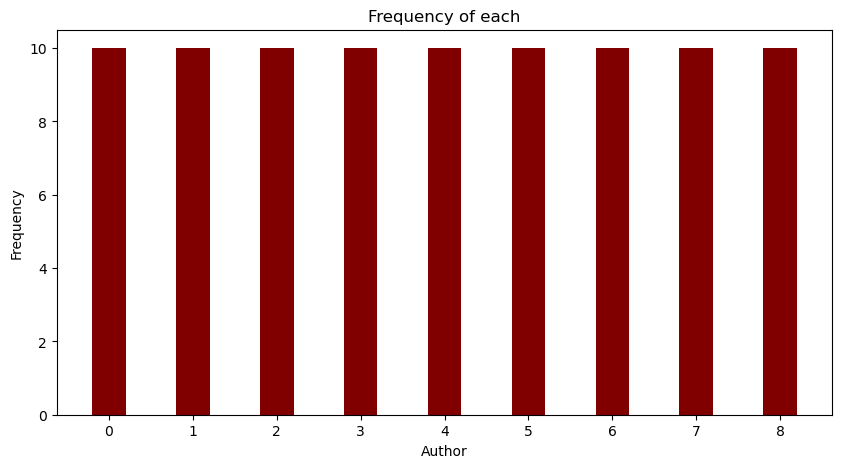

In [40]:
import matplotlib.pyplot as plt

data = dict(df['author'].value_counts())
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Author")
plt.ylabel("Frequency")
plt.title("Frequency of each")
plt.show()

In [41]:
import re

df['text']= df['text'].apply(lambda x: re.sub('[^ا-ي\s]','',x))



In [42]:
MAX_FEATURES = 1000
NUM_CLASSES = 9

In [43]:
from nltk.corpus import stopwords
X = df['text']
Y = df['author']

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES,stop_words=stopwords.words('arabic'))
X = vectorizer.fit_transform(X).toarray()
Y = Y.to_numpy()


c:\Users\Eldeeb\.conda\envs\env_2\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


In [44]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y,dtype=np.int64)
X.shape , Y.shape

((90, 1000), (90,))

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Y = le.fit_transform(Y)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [47]:
features = vectorizer.get_feature_names_out()
df_post_processing = pd.DataFrame(X,columns=features).head()
df_post_processing.head()

,اتخاذ,اتفاق,ارتفاع,استخدام,استغلال,استفتا,استقرار,استمرار,استهداف,استوكهولم,...,يقف,يقول,يقوم,يكد,يكن,يكون,يمثل,يمكن,يوبيك,يوم
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.325622,0.0,0.0,0.207333,0.318965,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.144097,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.827757,0.0,0.0,0.000000,0.270278,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.357997,0.0,0.417053,0.0,0.0,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.703731,0.0,0.0,0.0,0.184557,0.0,0.0


### Splitting Dataset into traing,val,test

In [48]:
import numpy as np  

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train =x_train.reshape(-1,MAX_FEATURES,1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(62, 1000, 1) (14, 1000) (14, 1000)
(62,) (14,) (14,)


In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(0)
import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [72]:
BATCH_SIZE = 62
train_dl = torch.utils.data.DataLoader(dataset= list(zip(x_train,y_train)), shuffle=True)
val_dl = torch.utils.data.DataLoader(dataset= list(zip(x_val,y_val)), shuffle=True)
# test_dl = torch.utils.data.DataLoader(dataset= list(zip(x_test,y_test)), shuffle=True)

### Defining Model

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(MAX_FEATURES,1024)
        self.fc2 = nn.Linear(1024,64)
        self.fc3 = nn.Linear(64,NUM_CLASSES)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def train_model(optim = 'Adam', lr = 0.0001, num_epochs=20):
    model = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    if optim == 'SGD':
        optim = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9,nesterov=True,weight_decay=1e-5)
    else:
        optim = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=1e-5)
    

    epochs= tqdm.tqdm(range(num_epochs))
    n_total_steps = len(train_dl)

    trainingEpoch_loss = []
    validationEpoch_loss = []
    train_acc_history = []
    val_acc_history = []

    for epoch in epochs:
        train_loss = []
        model.train()

        n_correct = 0
        n_samples = 0
        for i,batch in enumerate(train_dl):
            
            input = batch[0].reshape(-1, MAX_FEATURES).to(device)
            label= batch[1].to(device)
            # Forward-pass
            output = model(input)
            loss = criterion(output,label)
            
            # Backward-pass and optimize
            optim.zero_grad()
            loss.backward()
            optim.step()
            train_loss.append(loss.item())

            _, pred = torch.max(output,1)
            n_samples += label.shape[0]
            n_correct += (pred == label).sum().item()

        train_acc= 100.0 * n_correct / n_samples
        train_acc_history.append(train_acc)
        loss_now = np.mean(train_loss)
        trainingEpoch_loss.append(loss_now)
        model.eval()     # Optional when not using Model Specific layer

        n_correct = 0
        n_samples = 0
        for i, batch in enumerate(val_dl):
            validationStep_loss = []
            input = batch[0].reshape(-1, MAX_FEATURES).to(device)    
            label= batch[1].to(device)
            # Forward Pass
            outputs = model(input)
            # Find the Loss
            validation_loss = criterion(outputs, label)
            # Calculate Loss
            validationStep_loss.append(validation_loss.item())

            _, pred = torch.max(outputs,1)
            n_samples += label.shape[0]
            n_correct += (pred == label).sum().item()

        val_acc= 100.0 * n_correct / n_samples
        val_acc_history.append(val_acc)
        validationEpoch_loss.append(np.array(validationStep_loss).mean())
        epochs.set_postfix({"loss": loss.item(), "val_loss": validation_loss.item(),"train_acc": train_acc,"val_acc": val_acc})
        print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/ {n_total_steps}, loss = {loss.item():.4f}, val_loss = {validation_loss.item():.4f}')
    return model, trainingEpoch_loss, train_acc_history, validationEpoch_loss, val_acc_history


### Training Models

In [83]:
print('Training with Adam Optimizer')
adam_model, adam_training_losses,adam_training_acc,adam_val_losses,adam_val_acc= train_model('Adam',0.0001,40)
print('Training with SGD Optimizer')
SGD_model, SGD_training_losses,SGD_training_acc,SGD_val_losses,SGD_val_acc= train_model('SGD',0.001,60)

Training with Adam Optimizer


  0%|          | 0/40 [00:00<?, ?it/s]

  5%|▌         | 2/40 [00:00<00:07,  5.12it/s, loss=2.26, val_loss=2.14, train_acc=14.5, val_acc=21.4]

epoch 1 / 40, step 14/ 62, loss = 2.1181, val_loss = 2.1288
epoch 2 / 40, step 14/ 62, loss = 2.2614, val_loss = 2.1351


 10%|█         | 4/40 [00:00<00:06,  5.63it/s, loss=2.29, val_loss=2.23, train_acc=43.5, val_acc=35.7]

epoch 3 / 40, step 14/ 62, loss = 2.0610, val_loss = 2.0867
epoch 4 / 40, step 14/ 62, loss = 2.2911, val_loss = 2.2328


 15%|█▌        | 6/40 [00:01<00:05,  5.90it/s, loss=1.71, val_loss=2.24, train_acc=64.5, val_acc=50]  

epoch 5 / 40, step 14/ 62, loss = 1.9434, val_loss = 2.2198
epoch 6 / 40, step 14/ 62, loss = 1.7148, val_loss = 2.2406


 20%|██        | 8/40 [00:01<00:05,  5.82it/s, loss=1.43, val_loss=2.22, train_acc=88.7, val_acc=64.3]

epoch 7 / 40, step 14/ 62, loss = 1.7748, val_loss = 2.2907
epoch 8 / 40, step 14/ 62, loss = 1.4275, val_loss = 2.2152


 25%|██▌       | 10/40 [00:01<00:05,  5.67it/s, loss=1.58, val_loss=1.1, train_acc=93.5, val_acc=71.4] 

epoch 9 / 40, step 14/ 62, loss = 0.9308, val_loss = 2.2870
epoch 10 / 40, step 14/ 62, loss = 1.5824, val_loss = 1.1028


 30%|███       | 12/40 [00:02<00:04,  5.61it/s, loss=1.26, val_loss=1.13, train_acc=100, val_acc=71.4]

epoch 11 / 40, step 14/ 62, loss = 1.5428, val_loss = 1.1843
epoch 12 / 40, step 14/ 62, loss = 1.2610, val_loss = 1.1347


 35%|███▌      | 14/40 [00:02<00:04,  5.73it/s, loss=1.29, val_loss=2.14, train_acc=98.4, val_acc=71.4]

epoch 13 / 40, step 14/ 62, loss = 0.1432, val_loss = 2.3169
epoch 14 / 40, step 14/ 62, loss = 1.2934, val_loss = 2.1354


 40%|████      | 16/40 [00:02<00:04,  5.81it/s, loss=0.28, val_loss=1.96, train_acc=98.4, val_acc=78.6]

epoch 15 / 40, step 14/ 62, loss = 0.5427, val_loss = 1.9422
epoch 16 / 40, step 14/ 62, loss = 0.2803, val_loss = 1.9610


 42%|████▎     | 17/40 [00:03<00:04,  5.61it/s, loss=0.276, val_loss=0.65, train_acc=100, val_acc=78.6] 

epoch 17 / 40, step 14/ 62, loss = 0.6692, val_loss = 2.0496


 48%|████▊     | 19/40 [00:03<00:03,  5.54it/s, loss=0.14, val_loss=1.96, train_acc=100, val_acc=78.6] 

epoch 18 / 40, step 14/ 62, loss = 0.2759, val_loss = 0.6503
epoch 19 / 40, step 14/ 62, loss = 0.1405, val_loss = 1.9615


 50%|█████     | 20/40 [00:03<00:03,  5.46it/s, loss=0.563, val_loss=0.389, train_acc=98.4, val_acc=85.7]

epoch 20 / 40, step 14/ 62, loss = 0.0835, val_loss = 2.0235


 55%|█████▌    | 22/40 [00:03<00:03,  5.45it/s, loss=0.243, val_loss=0.178, train_acc=100, val_acc=85.7] 

epoch 21 / 40, step 14/ 62, loss = 0.5633, val_loss = 0.3892
epoch 22 / 40, step 14/ 62, loss = 0.2425, val_loss = 0.1783


 60%|██████    | 24/40 [00:04<00:02,  5.67it/s, loss=0.0402, val_loss=0.449, train_acc=100, val_acc=85.7]

epoch 23 / 40, step 14/ 62, loss = 0.0973, val_loss = 0.2710
epoch 24 / 40, step 14/ 62, loss = 0.0402, val_loss = 0.4489


 65%|██████▌   | 26/40 [00:04<00:02,  5.72it/s, loss=0.0178, val_loss=0.79, train_acc=100, val_acc=85.7] 

epoch 25 / 40, step 14/ 62, loss = 0.0561, val_loss = 0.2780
epoch 26 / 40, step 14/ 62, loss = 0.0178, val_loss = 0.7905


 70%|███████   | 28/40 [00:04<00:02,  5.77it/s, loss=0.012, val_loss=0.152, train_acc=100, val_acc=85.7]

epoch 27 / 40, step 14/ 62, loss = 0.1430, val_loss = 2.3653
epoch 28 / 40, step 14/ 62, loss = 0.0120, val_loss = 0.1516


 72%|███████▎  | 29/40 [00:05<00:01,  5.78it/s, loss=0.00405, val_loss=0.659, train_acc=100, val_acc=92.9]

epoch 29 / 40, step 14/ 62, loss = 0.0514, val_loss = 0.6837


 78%|███████▊  | 31/40 [00:05<00:01,  5.62it/s, loss=0.00155, val_loss=1.65, train_acc=100, val_acc=92.9] 

epoch 30 / 40, step 14/ 62, loss = 0.0040, val_loss = 0.6594
epoch 31 / 40, step 14/ 62, loss = 0.0016, val_loss = 1.6503


 82%|████████▎ | 33/40 [00:05<00:01,  5.60it/s, loss=0.0865, val_loss=0.975, train_acc=100, val_acc=92.9]

epoch 32 / 40, step 14/ 62, loss = 0.3251, val_loss = 0.7151
epoch 33 / 40, step 14/ 62, loss = 0.0865, val_loss = 0.9751


 88%|████████▊ | 35/40 [00:06<00:00,  5.71it/s, loss=0.116, val_loss=0.692, train_acc=100, val_acc=92.9] 

epoch 34 / 40, step 14/ 62, loss = 0.1845, val_loss = 0.0468
epoch 35 / 40, step 14/ 62, loss = 0.1161, val_loss = 0.6925


 92%|█████████▎| 37/40 [00:06<00:00,  5.65it/s, loss=0.000542, val_loss=0.0692, train_acc=100, val_acc=92.9]

epoch 36 / 40, step 14/ 62, loss = 0.0010, val_loss = 0.5340
epoch 37 / 40, step 14/ 62, loss = 0.0005, val_loss = 0.0692


 95%|█████████▌| 38/40 [00:06<00:00,  5.50it/s, loss=0.00799, val_loss=0.223, train_acc=100, val_acc=92.9]  

epoch 38 / 40, step 14/ 62, loss = 0.0086, val_loss = 0.0711


 98%|█████████▊| 39/40 [00:07<00:00,  5.39it/s, loss=0.00224, val_loss=0.0527, train_acc=100, val_acc=92.9]

epoch 39 / 40, step 14/ 62, loss = 0.0080, val_loss = 0.2232


100%|██████████| 40/40 [00:07<00:00,  5.60it/s, loss=0.00224, val_loss=0.0527, train_acc=100, val_acc=92.9]


epoch 40 / 40, step 14/ 62, loss = 0.0022, val_loss = 0.0527
Training with SGD Optimizer


  2%|▏         | 1/60 [00:00<00:09,  6.53it/s, loss=2.14, val_loss=2.2, train_acc=8.06, val_acc=14.3]

epoch 1 / 60, step 14/ 62, loss = 2.1439, val_loss = 2.2003


  3%|▎         | 2/60 [00:00<00:08,  6.60it/s, loss=2.43, val_loss=2.41, train_acc=12.9, val_acc=14.3]

epoch 2 / 60, step 14/ 62, loss = 2.4294, val_loss = 2.4095


  5%|▌         | 3/60 [00:00<00:08,  6.57it/s, loss=2.09, val_loss=2.42, train_acc=17.7, val_acc=7.14]

epoch 3 / 60, step 14/ 62, loss = 2.0898, val_loss = 2.4243


  7%|▋         | 4/60 [00:00<00:08,  6.57it/s, loss=2.09, val_loss=2.16, train_acc=21, val_acc=7.14]  

epoch 4 / 60, step 14/ 62, loss = 2.0949, val_loss = 2.1607


  8%|▊         | 5/60 [00:00<00:08,  6.49it/s, loss=2.08, val_loss=2.14, train_acc=27.4, val_acc=0] 

epoch 5 / 60, step 14/ 62, loss = 2.0814, val_loss = 2.1399


 10%|█         | 6/60 [00:00<00:08,  6.56it/s, loss=1.82, val_loss=2.17, train_acc=32.3, val_acc=0]

epoch 6 / 60, step 14/ 62, loss = 1.8194, val_loss = 2.1692


 12%|█▏        | 7/60 [00:01<00:08,  6.55it/s, loss=1.98, val_loss=2.12, train_acc=33.9, val_acc=0]

epoch 7 / 60, step 14/ 62, loss = 1.9820, val_loss = 2.1249


 13%|█▎        | 8/60 [00:01<00:08,  6.50it/s, loss=2.11, val_loss=2.16, train_acc=32.3, val_acc=0]

epoch 8 / 60, step 14/ 62, loss = 2.1124, val_loss = 2.1611


 15%|█▌        | 9/60 [00:01<00:07,  6.47it/s, loss=2.15, val_loss=2.49, train_acc=50, val_acc=0]  

epoch 9 / 60, step 14/ 62, loss = 2.1487, val_loss = 2.4875


 17%|█▋        | 10/60 [00:01<00:07,  6.37it/s, loss=2.02, val_loss=2.04, train_acc=59.7, val_acc=0]

epoch 10 / 60, step 14/ 62, loss = 2.0164, val_loss = 2.0355


 18%|█▊        | 11/60 [00:01<00:07,  6.23it/s, loss=1.58, val_loss=2.65, train_acc=37.1, val_acc=0]

epoch 11 / 60, step 14/ 62, loss = 1.5837, val_loss = 2.6536


 20%|██        | 12/60 [00:01<00:07,  6.20it/s, loss=2.47, val_loss=2.52, train_acc=69.4, val_acc=0]

epoch 12 / 60, step 14/ 62, loss = 2.4698, val_loss = 2.5183


 22%|██▏       | 13/60 [00:02<00:07,  6.23it/s, loss=1.54, val_loss=2.06, train_acc=72.6, val_acc=35.7]

epoch 13 / 60, step 14/ 62, loss = 1.5440, val_loss = 2.0615


 23%|██▎       | 14/60 [00:02<00:07,  6.24it/s, loss=1.44, val_loss=1.84, train_acc=77.4, val_acc=50]  

epoch 14 / 60, step 14/ 62, loss = 1.4440, val_loss = 1.8369


 25%|██▌       | 15/60 [00:02<00:07,  6.31it/s, loss=1.62, val_loss=2.82, train_acc=80.6, val_acc=57.1]

epoch 15 / 60, step 14/ 62, loss = 1.6157, val_loss = 2.8200


 27%|██▋       | 16/60 [00:02<00:06,  6.35it/s, loss=0.825, val_loss=1.83, train_acc=82.3, val_acc=64.3]

epoch 16 / 60, step 14/ 62, loss = 0.8249, val_loss = 1.8254


 28%|██▊       | 17/60 [00:02<00:06,  6.37it/s, loss=1.39, val_loss=2.72, train_acc=87.1, val_acc=64.3] 

epoch 17 / 60, step 14/ 62, loss = 1.3851, val_loss = 2.7232


 30%|███       | 18/60 [00:02<00:06,  6.31it/s, loss=0.262, val_loss=1.35, train_acc=90.3, val_acc=64.3]

epoch 18 / 60, step 14/ 62, loss = 0.2625, val_loss = 1.3514


 32%|███▏      | 19/60 [00:02<00:06,  6.30it/s, loss=0.382, val_loss=1.09, train_acc=96.8, val_acc=64.3]

epoch 19 / 60, step 14/ 62, loss = 0.3819, val_loss = 1.0868


 33%|███▎      | 20/60 [00:03<00:06,  6.26it/s, loss=1.24, val_loss=2.22, train_acc=93.5, val_acc=71.4] 

epoch 20 / 60, step 14/ 62, loss = 1.2380, val_loss = 2.2239


 35%|███▌      | 21/60 [00:03<00:06,  6.08it/s, loss=1.42, val_loss=1.21, train_acc=98.4, val_acc=71.4]

epoch 21 / 60, step 14/ 62, loss = 1.4197, val_loss = 1.2064


 37%|███▋      | 22/60 [00:03<00:06,  5.90it/s, loss=1.11, val_loss=0.668, train_acc=95.2, val_acc=71.4]

epoch 22 / 60, step 14/ 62, loss = 1.1108, val_loss = 0.6684


 37%|███▋      | 22/60 [00:03<00:06,  5.90it/s, loss=0.0542, val_loss=0.589, train_acc=98.4, val_acc=85.7]

epoch 23 / 60, step 14/ 62, loss = 0.0542, val_loss = 0.5891


 40%|████      | 24/60 [00:03<00:06,  5.87it/s, loss=0.242, val_loss=2.01, train_acc=100, val_acc=85.7]   

epoch 24 / 60, step 14/ 62, loss = 0.2418, val_loss = 2.0148


 43%|████▎     | 26/60 [00:04<00:05,  5.72it/s, loss=0.0429, val_loss=0.352, train_acc=98.4, val_acc=85.7]

epoch 25 / 60, step 14/ 62, loss = 0.2176, val_loss = 1.5146
epoch 26 / 60, step 14/ 62, loss = 0.0429, val_loss = 0.3525


 47%|████▋     | 28/60 [00:04<00:05,  5.86it/s, loss=0.188, val_loss=0.553, train_acc=96.8, val_acc=85.7]  

epoch 27 / 60, step 14/ 62, loss = 0.0052, val_loss = 0.5305
epoch 28 / 60, step 14/ 62, loss = 0.1879, val_loss = 0.5535


 50%|█████     | 30/60 [00:04<00:04,  6.08it/s, loss=0.132, val_loss=0.405, train_acc=100, val_acc=92.9] 

epoch 29 / 60, step 14/ 62, loss = 0.1041, val_loss = 1.3193
epoch 30 / 60, step 14/ 62, loss = 0.1323, val_loss = 0.4046


 53%|█████▎    | 32/60 [00:05<00:04,  6.18it/s, loss=0.0601, val_loss=0.194, train_acc=96.8, val_acc=85.7] 

epoch 31 / 60, step 14/ 62, loss = 0.0041, val_loss = 0.9151
epoch 32 / 60, step 14/ 62, loss = 0.0601, val_loss = 0.1942


 57%|█████▋    | 34/60 [00:05<00:04,  6.25it/s, loss=0.0177, val_loss=0.587, train_acc=98.4, val_acc=85.7]

epoch 33 / 60, step 14/ 62, loss = 0.0095, val_loss = 0.1935
epoch 34 / 60, step 14/ 62, loss = 0.0177, val_loss = 0.5871


 60%|██████    | 36/60 [00:05<00:03,  6.23it/s, loss=0.00409, val_loss=0.68, train_acc=100, val_acc=92.9] 

epoch 35 / 60, step 14/ 62, loss = 0.0038, val_loss = 0.1671
epoch 36 / 60, step 14/ 62, loss = 0.0041, val_loss = 0.6801


 63%|██████▎   | 38/60 [00:06<00:03,  6.22it/s, loss=0.00181, val_loss=1.48, train_acc=100, val_acc=85.7]

epoch 37 / 60, step 14/ 62, loss = 0.2307, val_loss = 0.6481
epoch 38 / 60, step 14/ 62, loss = 0.0018, val_loss = 1.4778


 67%|██████▋   | 40/60 [00:06<00:03,  5.99it/s, loss=0.00188, val_loss=0.289, train_acc=100, val_acc=92.9]

epoch 39 / 60, step 14/ 62, loss = 0.0742, val_loss = 1.1730
epoch 40 / 60, step 14/ 62, loss = 0.0019, val_loss = 0.2891


 70%|███████   | 42/60 [00:06<00:02,  6.19it/s, loss=0.00217, val_loss=0.299, train_acc=100, val_acc=85.7]

epoch 41 / 60, step 14/ 62, loss = 0.0026, val_loss = 1.4688
epoch 42 / 60, step 14/ 62, loss = 0.0022, val_loss = 0.2988


 73%|███████▎  | 44/60 [00:07<00:02,  6.17it/s, loss=1.42e-5, val_loss=1.64, train_acc=100, val_acc=85.7] 

epoch 43 / 60, step 14/ 62, loss = 0.0213, val_loss = 1.1690
epoch 44 / 60, step 14/ 62, loss = 0.0000, val_loss = 1.6356


 77%|███████▋  | 46/60 [00:07<00:02,  6.24it/s, loss=0.000193, val_loss=0.105, train_acc=100, val_acc=85.7]

epoch 45 / 60, step 14/ 62, loss = 0.0001, val_loss = 0.0678
epoch 46 / 60, step 14/ 62, loss = 0.0002, val_loss = 0.1045


 80%|████████  | 48/60 [00:07<00:01,  6.23it/s, loss=0.321, val_loss=0.0753, train_acc=100, val_acc=85.7]  

epoch 47 / 60, step 14/ 62, loss = 0.0000, val_loss = 0.9114
epoch 48 / 60, step 14/ 62, loss = 0.3213, val_loss = 0.0753


 83%|████████▎ | 50/60 [00:08<00:01,  6.03it/s, loss=0.0229, val_loss=1.13, train_acc=100, val_acc=85.7] 

epoch 49 / 60, step 14/ 62, loss = 0.0156, val_loss = 1.6469
epoch 50 / 60, step 14/ 62, loss = 0.0229, val_loss = 1.1278


 87%|████████▋ | 52/60 [00:08<00:01,  6.14it/s, loss=0.038, val_loss=0.376, train_acc=100, val_acc=85.7]

epoch 51 / 60, step 14/ 62, loss = 0.1499, val_loss = 0.4233
epoch 52 / 60, step 14/ 62, loss = 0.0380, val_loss = 0.3756


 90%|█████████ | 54/60 [00:08<00:00,  6.19it/s, loss=0.00511, val_loss=0.226, train_acc=100, val_acc=85.7]

epoch 53 / 60, step 14/ 62, loss = 0.0105, val_loss = 1.9056
epoch 54 / 60, step 14/ 62, loss = 0.0051, val_loss = 0.2257


 93%|█████████▎| 56/60 [00:09<00:00,  6.27it/s, loss=0.00719, val_loss=0.223, train_acc=100, val_acc=92.9]

epoch 55 / 60, step 14/ 62, loss = 0.1453, val_loss = 0.2236
epoch 56 / 60, step 14/ 62, loss = 0.0072, val_loss = 0.2226


 97%|█████████▋| 58/60 [00:09<00:00,  6.16it/s, loss=0.028, val_loss=0.301, train_acc=100, val_acc=85.7]  

epoch 57 / 60, step 14/ 62, loss = 0.0023, val_loss = 0.1941
epoch 58 / 60, step 14/ 62, loss = 0.0280, val_loss = 0.3010


100%|██████████| 60/60 [00:09<00:00,  6.18it/s, loss=0.000213, val_loss=0.0869, train_acc=100, val_acc=85.7]

epoch 59 / 60, step 14/ 62, loss = 0.0030, val_loss = 0.0831
epoch 60 / 60, step 14/ 62, loss = 0.0002, val_loss = 0.0869


### Plotting learning curves

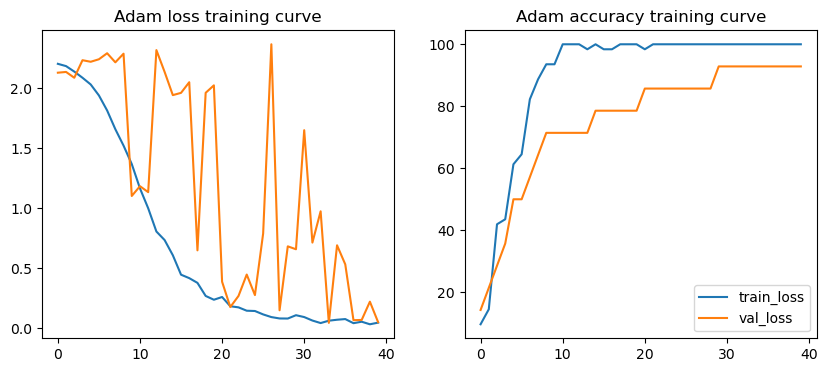

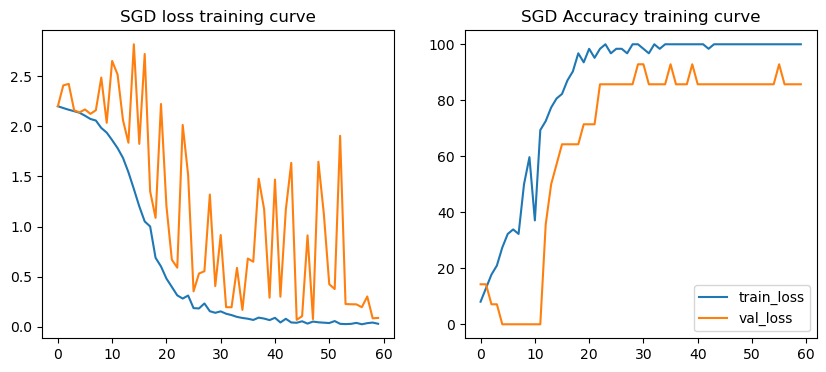

In [84]:
from matplotlib import pyplot as plt
# adam_training_losses,adam_training_acc,adam_val_losses,adam_val_acc
# Plotting of Adam training results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Adam loss training curve") 
plt.plot(adam_training_losses, label='train_loss')
plt.plot(adam_val_losses,label='val_loss')

plt.subplot(1,2,2)
plt.title("Adam accuracy training curve") 
plt.plot(adam_training_acc, label='train_loss')
plt.plot(adam_val_acc,label='val_loss')

plt.legend()
plt.show()

# Plotting of SGD training results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("SGD loss training curve") 
plt.plot(SGD_training_losses, label='train_loss')
plt.plot(SGD_val_losses,label='val_loss')

plt.subplot(1,2,2)
plt.title("SGD Accuracy training curve") 
plt.plot(SGD_training_acc, label='train_loss')
plt.plot(SGD_val_acc,label='val_loss')

plt.legend()
plt.show()

### Testing model with Adam optimizer

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x_test = torch.Tensor(x_test).to(device)
outputs = adam_model(x_test)
_, pred = torch.max(outputs,1)
pred = pred.to('cpu')
mat= confusion_matrix(y_test,pred,labels=le.classes_)


<Axes: >

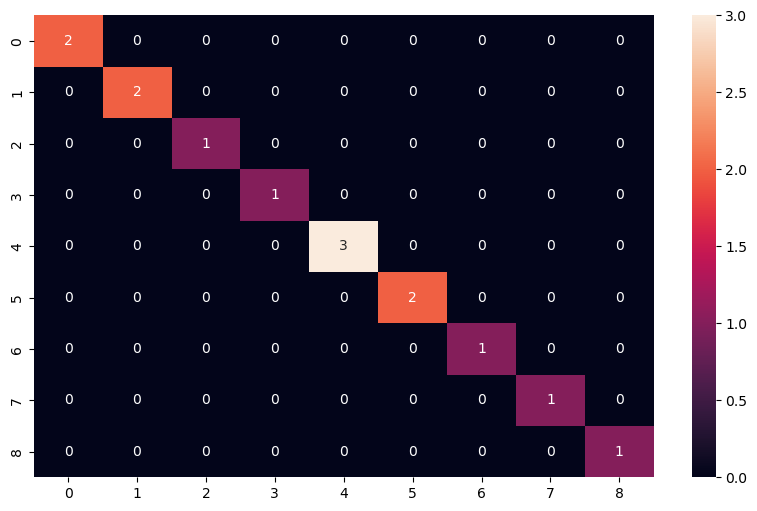

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(mat, annot= True,vmax=3)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



### Testing model with SGD optimizer

<Axes: >

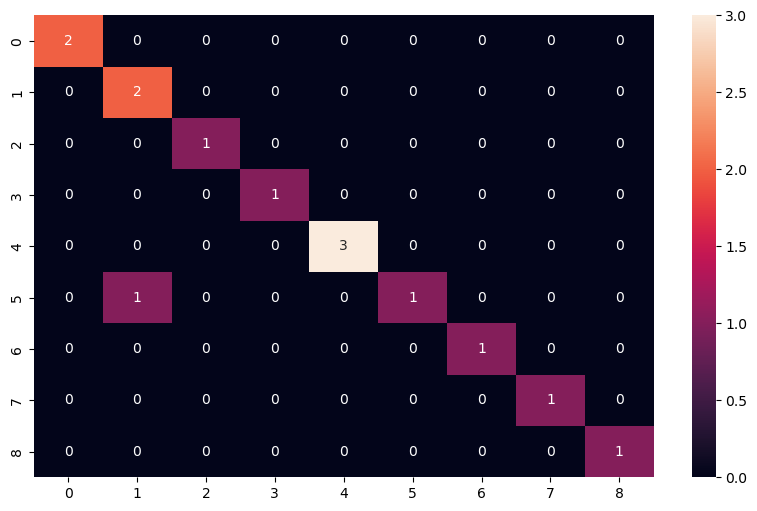

In [88]:
x_test = torch.Tensor(x_test).to(device)
outputs = SGD_model(x_test)
_, pred = torch.max(outputs,1)
pred = pred.to('cpu')
mat= confusion_matrix(y_test,pred,labels=le.classes_)
plt.figure(figsize=(10,6))
sns.heatmap(mat, annot= True,vmax=3)

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.96      0.94      0.94        14
weighted avg       0.95      0.93      0.92        14

